In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
plt.rc('font',family='Arial') 

In [41]:
merge_data=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\Each species non-genes num UG cMECOS.csv",index_col=0)

In [42]:
sort_index_1=merge_data[merge_data["UG"]==0].sort_values("cMECOS",ascending=False).index.tolist()

In [43]:
sort_index_2=merge_data[merge_data["UG"]!=0].sort_values("UG").index.tolist()

In [44]:
merge_data["addition"]=np.abs(merge_data["cMECOS"]-merge_data["UG"])

In [45]:
merge_data=merge_data.loc[sort_index_1+sort_index_2]

In [47]:
merge_data["cMECOS"].mean()

649.7213793103448

In [48]:
addition=pd.DataFrame(merge_data["cMECOS"]-merge_data["UG"])

In [51]:
merge_data["rank"]=range(len(merge_data))

Text(100, 2, 'Species with increased\ngene count:669')

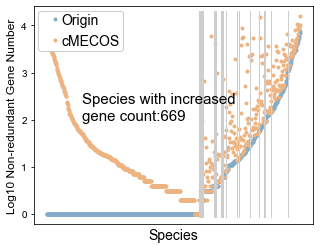

In [62]:
fig=plt.figure(figsize=[5,4])
ax=fig.add_subplot()
ax.plot([np.log10(i+1) for i in merge_data[["UG","cMECOS"]]["UG"].tolist()],'.',label="Origin",color="#84acc7")
ax.plot([np.log10(j+1) for j in merge_data[["UG","cMECOS"]]["cMECOS"].tolist()],'.',label="cMECOS",color="#edb380")
for i in merge_data[(merge_data["cMECOS"]-merge_data["UG"]<=0)&merge_data["UG"] > 0 ]["rank"]:
    ax.axvline(i,ls="-",color="#cdcdcd",lw=1,ymin=0.03,ymax=0.98)
ax.legend(shadow=False,fontsize=14,loc="upper left",framealpha=1,borderpad=0.2,handletextpad=-0.5,borderaxespad=0.3)
ax.set_yticks([0,1,2,3,4])
ax.set_xticks([])
ax.set_ylabel("Log10 Non-redundant Gene Number",size=12)
ax.set_xlabel("Species",size=14)
plt.text(100,2,"Species with increased\ngene count:{}".format(sum(merge_data["cMECOS"]-merge_data["UG"]>0)),fontsize=15)
# ax.axhline(np.log10(700),ls="--",color="grey")
# fig.savefig("培养提高非冗余基因数.pdf")

In [182]:
np.mean([np.log10(i+1) for i in merge_data[["UG","cMECOS"]]["cMECOS"].tolist()])

1.611551188853516

In [53]:
np.mean([np.log10(i+1) for i in merge_data[["UG","cMECOS"]]["UG"].tolist()])

0.6573424247892887

D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


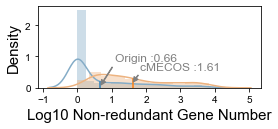

In [293]:
fig=plt.figure(figsize=[4,1.5])

sns.distplot([np.log10(i+1) for i in merge_data[["Uncul","cMECOS"]]["Uncul"].tolist()],label="Origin",color="#84acc7")
sns.distplot([np.log10(i+1) for i in merge_data[["Uncul","cMECOS"]]["cMECOS"].tolist()],label="cMECOS",color="#edb380")

plt.axvline(1.611551188853516,ymax=0.112,ls="-",color="#ff8011")
plt.axvline(0.6573424247892887,ymax=0.072,ls="-",color="#2c7fb8")
plt.annotate('cMECOS :1.61',size=12,color="grey",
ha = 'center', va = 'bottom',
xytext = (3, 0.5),
xy = (1.6, 0.15),
arrowprops = { 'facecolor' :None, 'shrink' : 0,'width':0.6,"headwidth":5,"headlength":5,"shrink":0.1,"color":"grey"}
)

plt.annotate('Origin :0.66',size=12,
ha = 'center', va = 'bottom',color="grey",
xytext = (2, 0.8),
xy = (0.64, 0.011),
arrowprops = { 'facecolor' : None, 'shrink' : 0,'width':0.6,"headwidth":5,"headlength":5,"shrink":0.1,"color":"grey"}
)
plt.ylabel("Density",size=15)
plt.xlabel("Log10 Non-redundant Gene Number",size=15)
plt.show()
# fig.savefig("培养提高非冗余基因数_addition.pdf")